In [1]:
import cnn_limits.notebook
import imp
imp.reload(cnn_limits.notebook)

from cnn_limits.notebook import ExperimentResults, el, plot_df

import matplotlib.pyplot as plt
import numpy as np

In [2]:
el["myrtle10_zca"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_lik_vs_acc/27", """
Replicating Myrtle10 for small data, like in Shankar et al. 2020. Using ZCA and mean-subtraction.
""")
el["myrtle10_nozca"] = ExperimentResults("sagarmatha:/scratch/ag919/logs/predict_lik_vs_acc/1", """
Replicating Myrtle10 for small data, like in Shankar et al. 2020. Using mean-subtraction.
""")

Text(0.5, 0, 'N. layer')

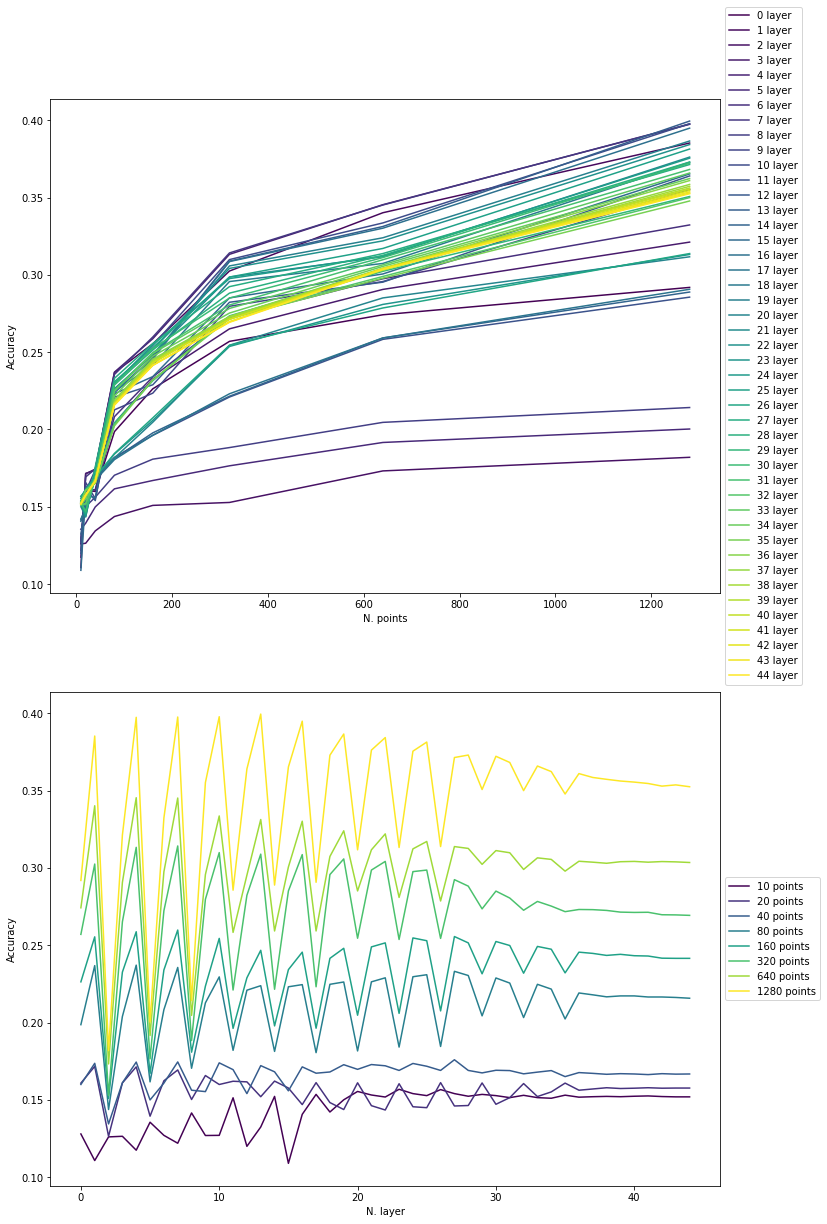

In [12]:
data = el["myrtle10_zca"].read_pickle("grid_lik_acc.pkl.gz")
df = data.applymap(lambda x: x[2].max())

lab1 = "points"
lab2 = "layer"

fig, axes = plt.subplots(2, 1, figsize=(12, 20))
ax = axes[0]
plot_df(ax, df, lab2)
ax.set_xlabel(f"N. {lab1}")
ax = axes[1]
plot_df(ax, df.T, lab1)
ax.set_xlabel(f"N. {lab2}")

In [7]:
df.loc[10, 0]

KeyError: 0

Help on method applymap in module pandas.core.frame:

applymap(func) method of pandas.core.frame.DataFrame instance
    Apply a function to a Dataframe elementwise.
    
    This method applies a function that accepts and returns a scalar
    to every element of a DataFrame.
    
    Parameters
    ----------
    func : callable
        Python function, returns a single value from a single value.
    
    Returns
    -------
    DataFrame
        Transformed DataFrame.
    
    See Also
    --------
    DataFrame.apply : Apply a function along input axis of DataFrame.
    
    Notes
    -----
    In the current implementation applymap calls `func` twice on the
    first column/row to decide whether it can take a fast or slow
    code path. This can lead to unexpected behavior if `func` has
    side-effects, as they will take effect twice for the first
    column/row.
    
    Examples
    --------
    >>> df = pd.DataFrame([[1, 2.12], [3.356, 4.567]])
    >>> df
           0      1
   